In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import requests
import re

In [ ]:
nazwy_ksiazek = ["dziewczynka-z-zapalkami.txt", "andersen-mala-syrenka.txt", "krolowa-sniegu.txt", "calineczka.txt", "demostenes-wybor-mow.txt", "rozprawa-o-metodzie.txt", "bulhakow-fatalne-jaja.txt", "capek-inwazja-jaszczurow.txt", "pies-baskervilleow.txt"]
korpus = []
for i in range(0, len(nazwy_ksiazek)):
  ksiazka = "https://wolnelektury.pl/media/book/txt/"+nazwy_ksiazek[i]
  doc = requests.get(ksiazka).text
  doc_without_numbers = re.sub(r'\d+', '', doc)
  doc_before = doc_without_numbers.split("-----")[0]
  korpus.append(doc_before)
print(len(korpus))

9


Dodałem 9 książek. Nazwy ich są przetrzymywane w tablicy nazwy_ksiazek. Usnąłem wszystkie tokent licznowe i usunąłem z każdego tekstu nagłówki końcowe.

In [ ]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(korpus)
names = vectorizer.get_feature_names_out()
print(names)
print(len(names))

['aaa' 'abażurami' 'abbey' ... 'żądzą' 'περί' 'συμμοριών']
38916


Stworzyłem CountVectorizer aby sprawdzić ilość występowania słów w całym korpusie

In [ ]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Dodałem funkcje rysowania wykresu słupkowego na podstawie macierzy X i nazw vectorizera

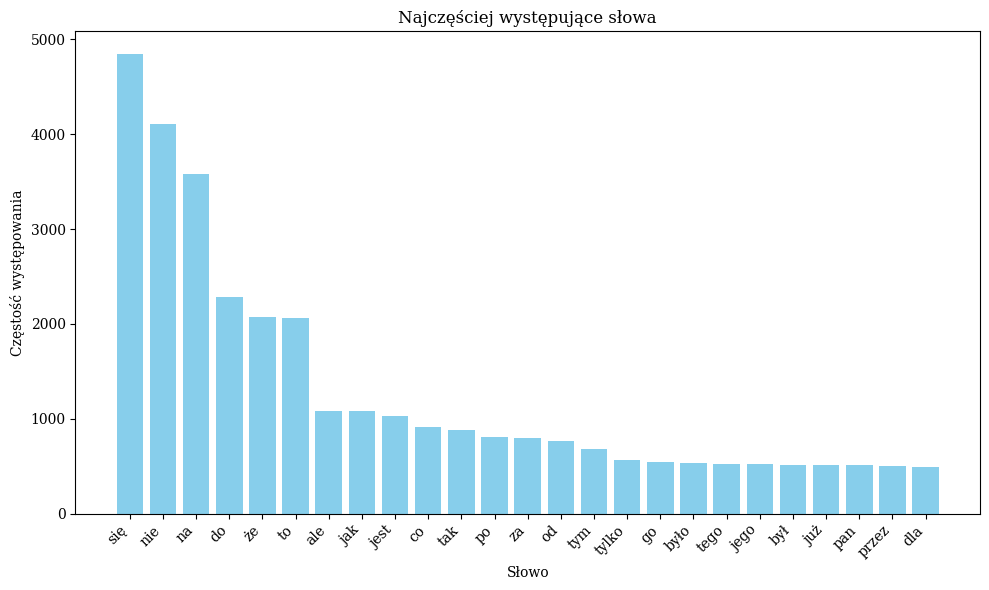

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def draw (X, names):

  frequencies = X.toarray().sum(axis=0)

  word_freq_df = pd.DataFrame({'Word': names, 'Frequency': frequencies})

  word_freq_df_sorted = word_freq_df.sort_values(by='Frequency', ascending=False)

  top_words = word_freq_df_sorted.head(25)

  import matplotlib.pyplot as plt

  plt.figure(figsize=(10, 6))
  plt.bar(top_words['Word'], top_words['Frequency'], color='skyblue')
  plt.title('Najczęściej występujące słowa')
  plt.xlabel('Słowo')
  plt.ylabel('Częstość występowania')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

draw(X, vectorizer.get_feature_names_out())

Widaż że dla całego korpusu prawo Zipfa jest spełnione. Duża większość wyrazów całego korpusu jest w większości pierwszymi 3 słowami "się" "nie" "na".

Pobieram polski stop_words i tworze ponownie CountVectorizer  uzwględnieniem stop_words. Weryfikuje rysując wykres. Widać że wszystkie stop_words zostały usunięte

fatal: destination path 'stopwords' already exists and is not an empty directory.
['a', 'aby', 'ach', 'acz', 'aczkolwiek', 'aj', 'albo', 'ale', 'alez', 'ależ', 'ani', 'az', 'aż', 'bardziej', 'bardzo', 'beda', 'bedzie', 'bez', 'deda', 'będą', 'bede', 'będę', 'będzie', 'bo', 'bowiem', 'by', 'byc', 'być', 'byl', 'byla', 'byli', 'bylo', 'byly', 'był', 'była', 'było', 'były', 'bynajmniej', 'cala', 'cali', 'caly', 'cała', 'cały', 'ci', 'cie', 'ciebie', 'cię', 'co', 'cokolwiek', 'cos', 'coś', 'czasami', 'czasem', 'czemu', 'czy', 'czyli', 'daleko', 'dla', 'dlaczego', 'dlatego', 'do', 'dobrze', 'dokad', 'dokąd', 'dosc', 'dość', 'duzo', 'dużo', 'dwa', 'dwaj', 'dwie', 'dwoje', 'dzis', 'dzisiaj', 'dziś', 'gdy', 'gdyby', 'gdyz', 'gdyż', 'gdzie', 'gdziekolwiek', 'gdzies', 'gdzieś', 'go', 'i', 'ich', 'ile', 'im', 'inna', 'inne', 'inny', 'innych', 'iz', 'iż', 'ja', 'jak', 'jakas', 'jakaś', 'jakby', 'jaki', 'jakichs', 'jakichś', 'jakie', 'jakis', 'jakiś', 'jakiz', 'jakiż', 'jakkolwiek', 'jako', 'jakos'

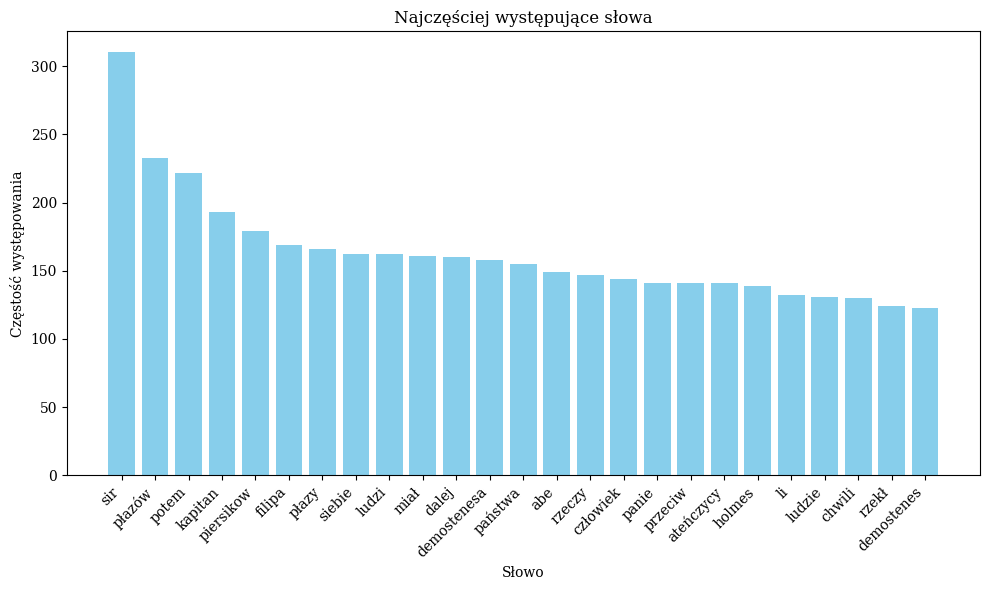

In [ ]:
!git clone 'https://github.com/bieli/stopwords.git'

with open('stopwords/polish.stopwords.txt', 'r', encoding='utf-8') as file:
    custom_stop_words = file.readlines()
custom_stop_words = [word.strip() for word in custom_stop_words]

print(custom_stop_words)

vectorizer = CountVectorizer(stop_words = custom_stop_words)

X = vectorizer.fit_transform(korpus)
names = vectorizer.get_feature_names_out()
print(len(names))

draw(X, names)

Pobieram potrzebny pakiet do lemanizacji

In [ ]:
!python -m spacy download pl_core_news_sm

2023-11-16 11:21:23.822070: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 11:21:23.822161: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 11:21:23.822229: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 11:21:25.462436: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 63.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')


Stosuję lemanizację i weryfikuje wynik przez wykres

In [ ]:
import spacy

nlp = spacy.load("pl_core_news_sm")
korpus2 =[]
lem = [nlp(x) for x in korpus]
for x in lem:
  korpus2.append(' '.join([w.lemma_ for w in x]))
X = vectorizer.fit_transform(korpus2)
vectorizer.get_feature_names_out()
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


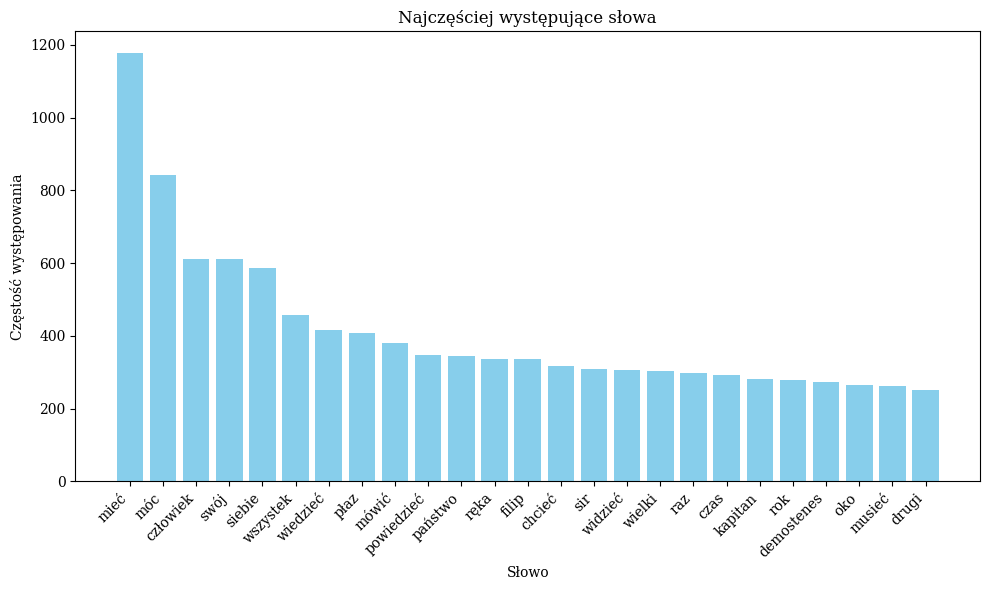

In [ ]:
draw(X, vectorizer.get_feature_names_out())

Tworzę macierz TF IDF

In [ ]:
vectorizer = TfidfVectorizer(smooth_idf=True)
X = vectorizer.fit_transform(korpus2)
vectorizer.get_feature_names_out()
print(X.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00184443 0.         ... 0.         0.         0.        ]
 [0.00068431 0.         0.00068431 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Tworzę funkcję do obliczenia odległości kosinusowej dla każdego tekstu z każdym

In [ ]:
def cos_diff(text1, text2):
  wiersz1 = X.toarray()[text1, :]
  wiersz2 = X.toarray()[text2, :]

  value = 0
  for i in range(len(wiersz1)):
    value += wiersz1[i] * wiersz2[i]

  return value

Tworzę maciesz odległości

In [ ]:
import pandas as pd

col_row = list(range(1, len(nazwy_ksiazek)+1))
macierz = pd.DataFrame(index=col_row, columns=col_row)

for index, row in macierz.iterrows():
    for col_index, value in row.items():
        macierz.at[index, col_index] = cos_diff(index-1, col_index-1)


print(macierz)

          1         2         3         4         5         6         7  \
1       1.0  0.605393  0.586636  0.544917  0.496397  0.465083  0.501407   
2  0.605393       1.0  0.768567  0.708017  0.682258  0.679614  0.679628   
3  0.586636  0.768567       1.0  0.689293  0.652315  0.660976  0.650418   
4  0.544917  0.708017  0.689293       1.0  0.622113   0.65498  0.594003   
5  0.496397  0.682258  0.652315  0.622113       1.0  0.737548  0.639916   
6  0.465083  0.679614  0.660976   0.65498  0.737548       1.0  0.614094   
7  0.501407  0.679628  0.650418  0.594003  0.639916  0.614094       1.0   
8   0.49377  0.701702  0.678919  0.644243  0.736874  0.775282  0.687349   
9  0.470762  0.676766  0.670296  0.645899  0.721839   0.79294  0.651403   

          8         9  
1   0.49377  0.470762  
2  0.701702  0.676766  
3  0.678919  0.670296  
4  0.644243  0.645899  
5  0.736874  0.721839  
6  0.775282   0.79294  
7  0.687349  0.651403  
8       1.0  0.782446  
9  0.782446       1.0  


Redukuje macierz do 2 wymiarów przez bibliotekę PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

korpus2_reduced = pca.fit_transform(X.toarray())

print(korpus2_reduced)

[[ 0.63709935  0.0348382 ]
 [ 0.1332816  -0.02512709]
 [ 0.14334654 -0.06917993]
 [ 0.11695002 -0.34515539]
 [-0.19708001  0.02395902]
 [-0.29367927 -0.14954135]
 [-0.01097579  0.51381945]
 [-0.24387733  0.06195594]
 [-0.28506511 -0.04556885]]


Tworzę wykres porównujący książki do siebie

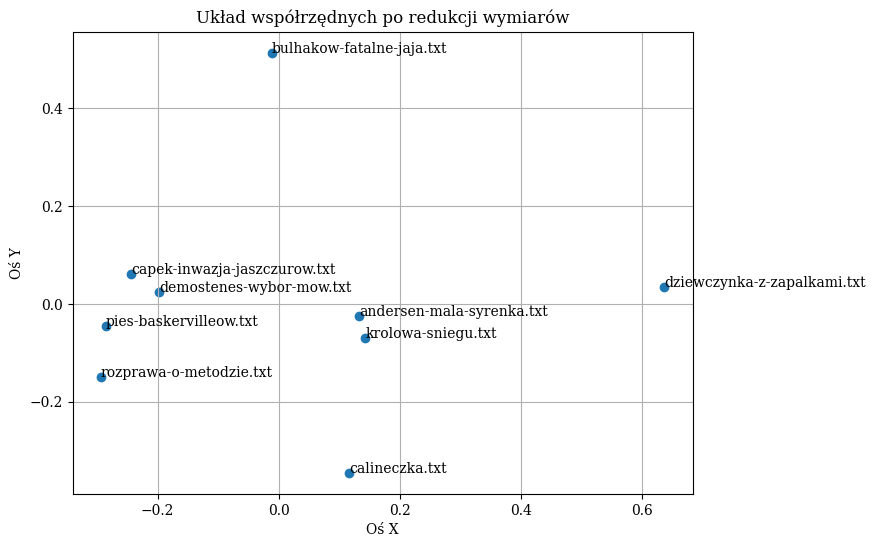

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(korpus2_reduced[:, 0], korpus2_reduced[:, 1], marker='o')

for row in range(len(nazwy_ksiazek)):
    plt.annotate(nazwy_ksiazek[row], (korpus2_reduced[row, 0], korpus2_reduced[row, 1]))

plt.title('Układ współrzędnych po redukcji wymiarów')
plt.xlabel('Oś X')
plt.ylabel('Oś Y')
plt.grid(True)
plt.show()

Widać że książki "Pies Baskervilleow" "Inwazja Jaszczurow" "Wyor mow" są do siebie podobne. Jeżeli spojrzymy na macierz odległości to jest to zgodne z macierzą. Te książki mają indeksy odpowiednio: 9, 8, 5. Na macierzy odległości te książki mają odpowiednie wartości do siebie:<br>
9 - 8 0.782446<br>
9 - 5 0.721839<br>
5 - 8 0.736874<br>
Co potwierdza wysunek